## Energy Efficiency of Buildings

The dataset includes features such as surface, wall, roof area, glass area, glass area distribution and orientation of 768 simulated building shapes. Based on this data, it is aimed to estimate the heating and cooling load of the building.

Link of the Dataset : https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso

In [2]:
os.chdir('C:\\Users\\baris\\Desktop\\Data Science')

In [3]:
data = pd.read_csv('ENB2012_data.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
"""
Attributes:

X1 : Relative Compactness

X2 : Surface Area

X3 : Wall Area

X4 : Roof Area

X5 : Overall Height

X6 : Orientation

X7 : Glazing Area

X8 : Glazing Area Distribution

y1 : Heating Load

y2 : Cooling Load

"""

'\nAttributes:\n\nX1 : Relative Compactness\n\nX2 : Surface Area\n\nX3 : Wall Area\n\nX4 : Roof Area\n\nX5 : Overall Height\n\nX6 : Orientation\n\nX7 : Glazing Area\n\nX8 : Glazing Area Distribution\n\ny1 : Heating Load\n\ny2 : Cooling Load\n\n'

In [5]:
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             766 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
overall_height,766.0,5.245431,1.751137,3.50,3.5000,3.50,7.0000,7.00
orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
heating_load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [8]:
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               2
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [9]:
data['overall_height'] = data['overall_height'].fillna(data['overall_height'].mean()) 
#filled missing values in Temperature column with mean values

In [10]:
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

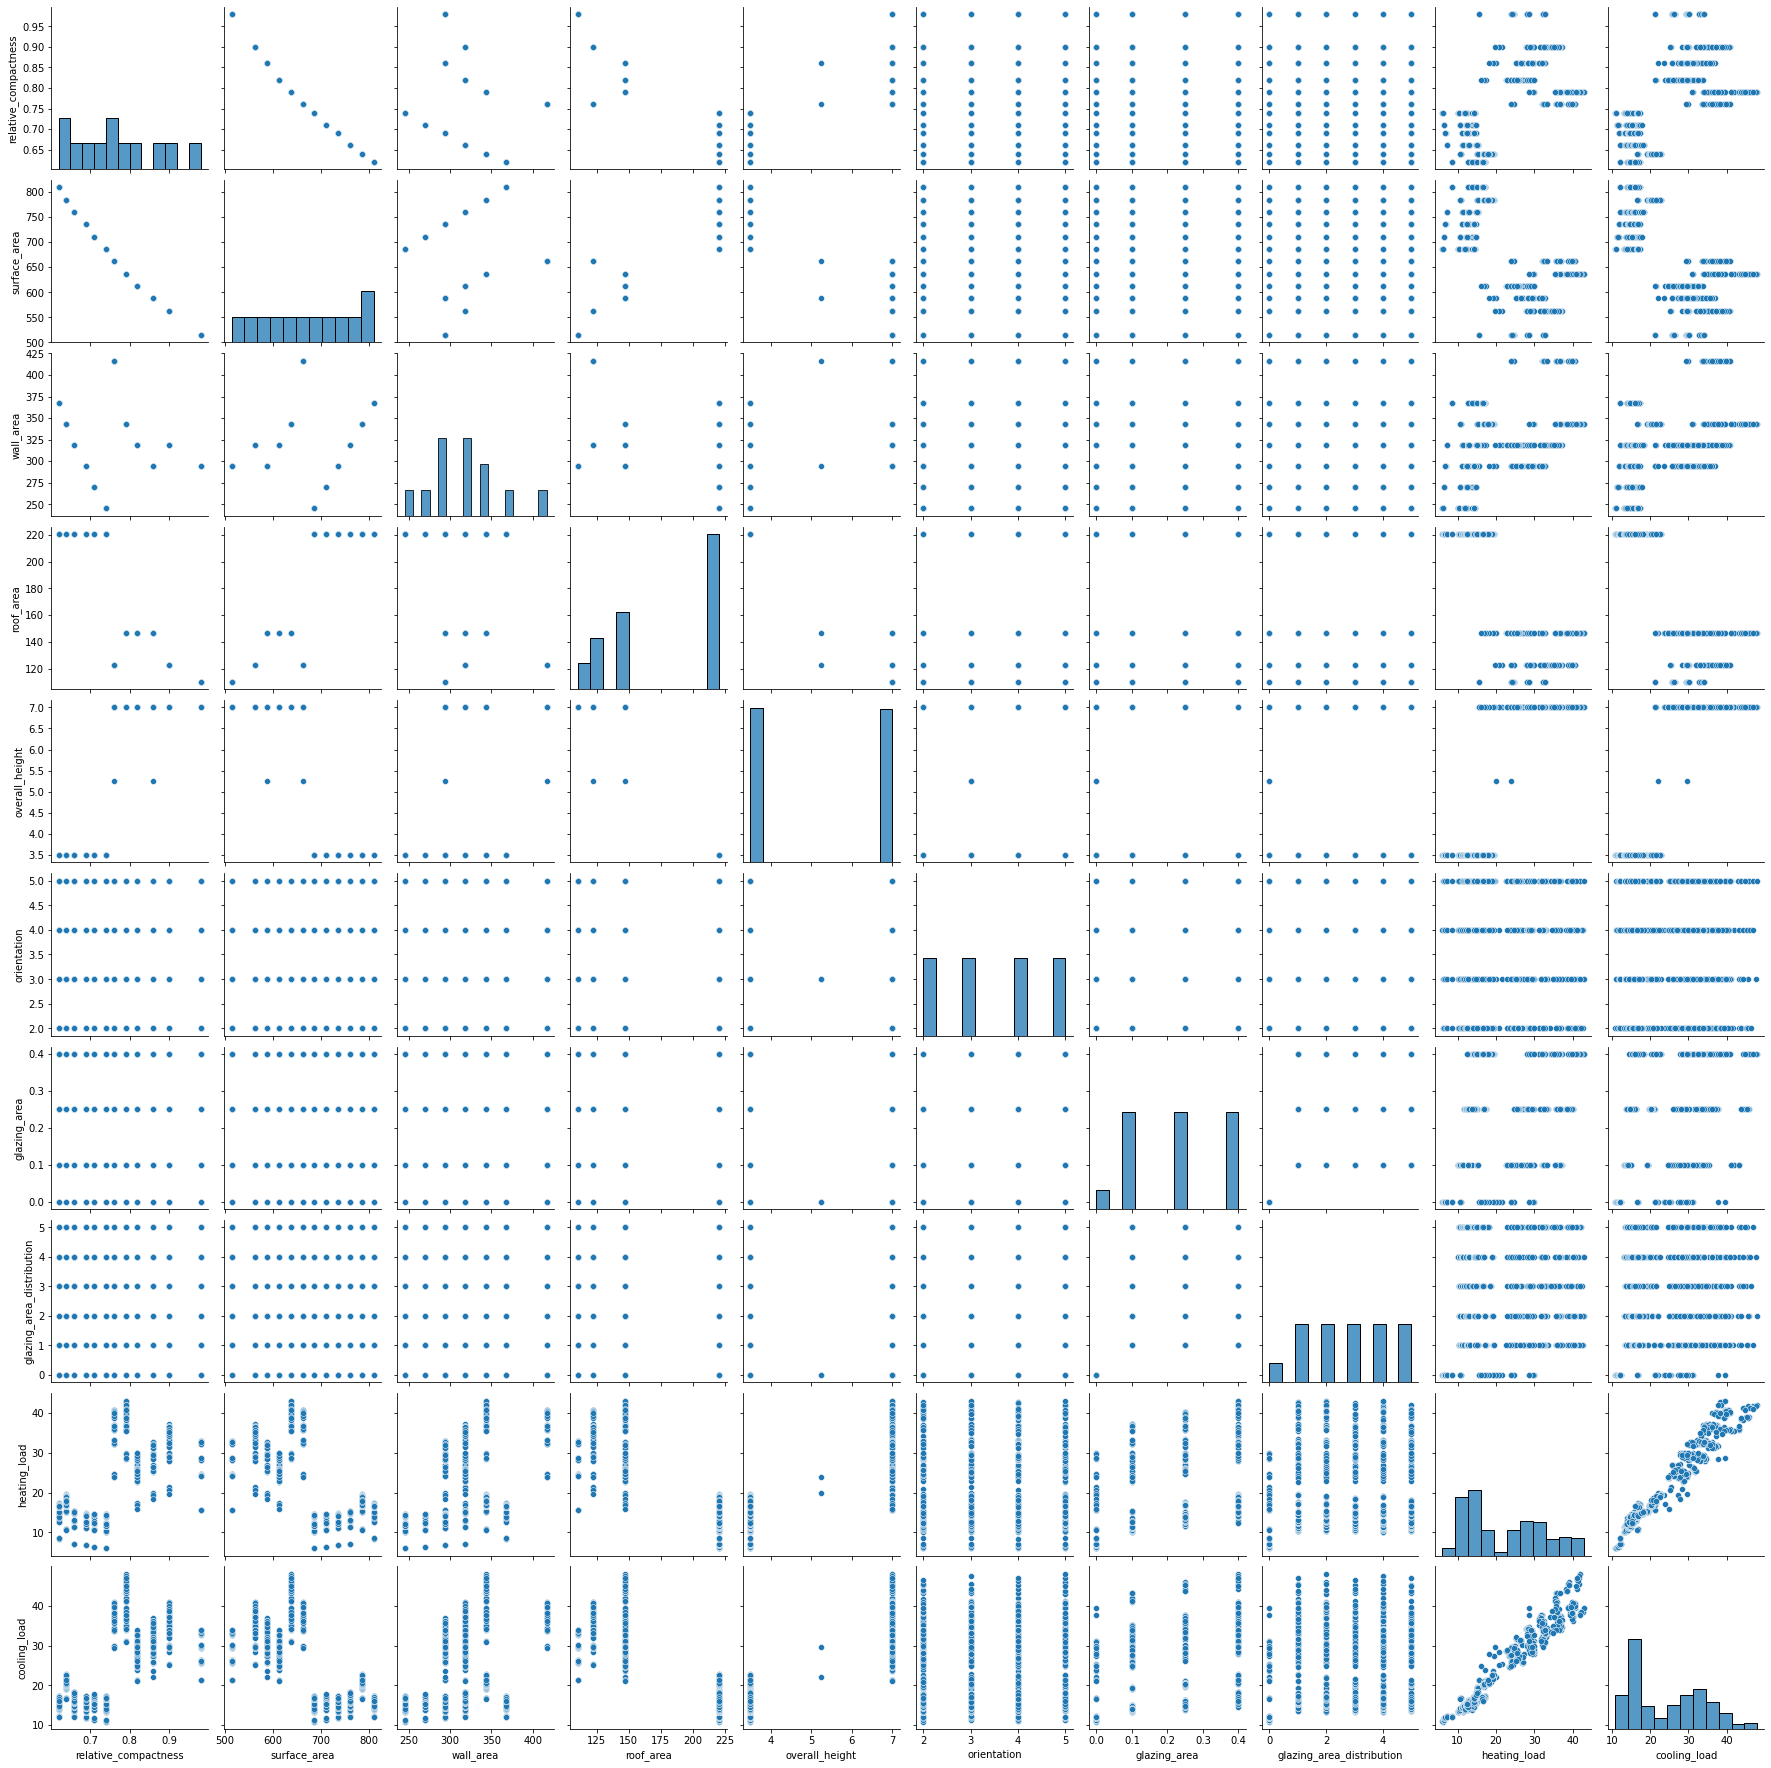

In [11]:
sns.pairplot(data)

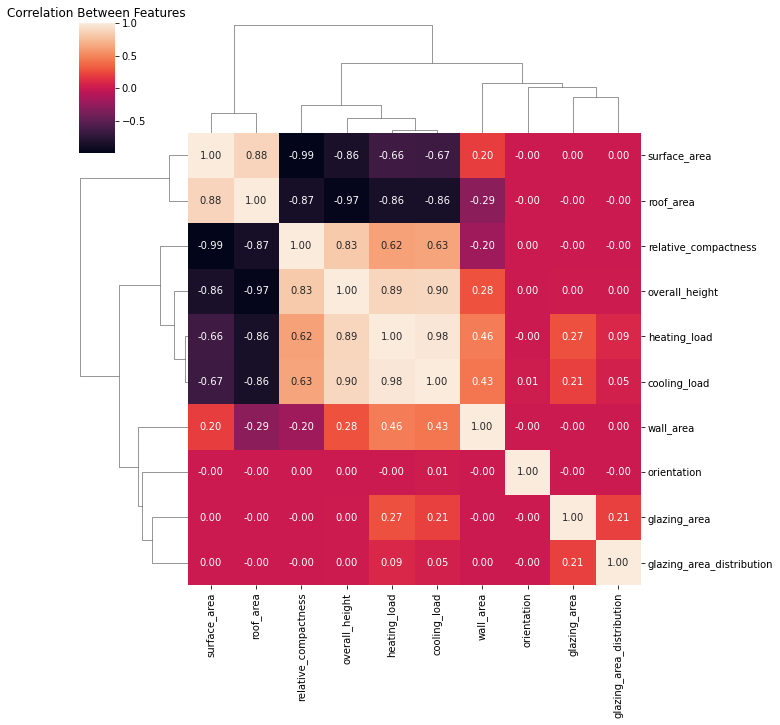

In [12]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Between Features')
plt.show()

In [13]:
nr = Normalizer(copy=False)
X = data.drop(['heating_load','cooling_load'], axis=1)
X = nr.fit_transform(X)
y = data[['heating_load','cooling_load']]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("The Shape of x train:", X_train.shape)
print("The Shape of x train:", X_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y train:", y_test.shape)

The Shape of x train: (614, 8)
The Shape of x train: (154, 8)
The Shape of y train: (614, 2)
The Shape of y train: (154, 2)


In [18]:
models = [LinearRegression, ElasticNet, Lasso]
for model in models:
    reg = model()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    err = mean_squared_error(y_test, pred) **.5
    print(f'RMSE of {model.__name__} model is: {err}')
    print(f'R2 value of {model.__name__} is: {np.mean(r2_score(y_test, pred))}')
    print('-'*50)

RMSE of LinearRegression model is: 3.0784616320332994
R2 value of LinearRegression is: 0.9030855438372704
--------------------------------------------------
RMSE of ElasticNet model is: 9.9539684797807
R2 value of ElasticNet is: -0.006579169551467756
--------------------------------------------------
RMSE of Lasso model is: 9.95599762815162
R2 value of Lasso is: -0.006966770766145491
--------------------------------------------------
